# Homework 2 Matplotlib

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
data =pd.read_csv('weather-check.csv')

In [46]:
data.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [47]:
data.set_index('RespondentID', inplace = True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 3887201482 to 3877548893
Data columns (total 8 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   Do you typically check a daily weather report?                                                                                                928 non-null    object
 1   How do you typically check the weather?                                                                                                       928 non-null    object
 2   A specific website or app (please provide the answer)                                                                                         928 non-null    object
 3   If you had a smartwatch (like 

In [49]:
data.describe(include = 'object')

,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
count,928,928,928,928,928,928,928,928
unique,2,9,122,5,5,3,12,10
top,Yes,The default weather app on your phone,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
freq,746,213,753,362,278,527,169,185


In [50]:
for i in data.columns:
    print(f"Column name:{i}",
          "\nUnique values: ", data[i].unique(),
          "\nNumber of unique values: ", data[i].nunique(), 
          "\n____")

Column name:Do you typically check a daily weather report? 
Unique values:  ['Yes' 'No'] 
Number of unique values:  2 
____
Column name:How do you typically check the weather? 
Unique values:  ['The default weather app on your phone'
 'A specific website or app (please provide the answer)'
 'The Weather Channel' '-' 'Internet search' 'Local TV News' 'Newspaper'
 'Radio weather' 'Newsletter'] 
Number of unique values:  9 
____
Column name:A specific website or app (please provide the answer) 
Unique values:  ['-' 'Iphone app' 'AccuWeather App' 'nice' 'Weather.com' 'Weatherbug'
 'weather channel app' 'Yahoo weather iphone' 'Weather Puppy'
 'AccuWeather' 'Apple weater' 'The Weather Channel app' 'google "weather"'
 'Weather Underground' 'Weather Timeline (android)' '1 weather'
 'Weather Channel app'
 'Weather Underground, also local tv news half the time.' 'weatherbug app'
 'weather bug' 'FancyClock app on my phone and accuweather.com'
 'GOES West Satalite' 'Intellicast / Storm' 'ipod weat

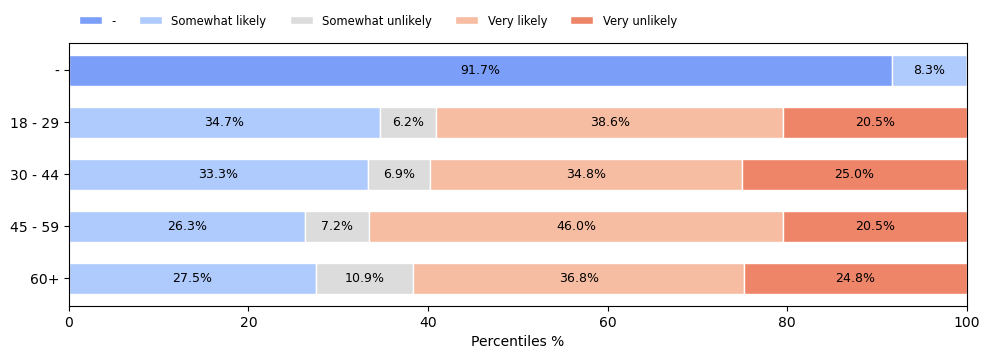

In [51]:
results = data.groupby("Age")["If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?"] \
    .value_counts() \
    .unstack(fill_value=0)

results_percentage = results.div(results.sum(axis=1), axis=0) * 100
category_names = results_percentage.columns.tolist()

def survey(results, category_names):
    labels = results.index.tolist()
    data = results.values  
    data_cum = data.cumsum(axis=1)

    category_colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.8, data.shape[1]))

    plt.figure(figsize=(10, len(labels) * 0.7))
    plt.gca().invert_yaxis()
    plt.xlim(0, 100)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = results.iloc[:, i].values
        starts = results.iloc[:, :i].sum(axis=1).values
        rects = plt.barh(labels, widths, left=starts, height=0.6, label=colname, color=color, edgecolor="white")

        for rect, label in zip(rects, widths):
            if label > 5:
                x = rect.get_x() + rect.get_width() / 2
                y = rect.get_y() + rect.get_height() / 2
                text_color = "white" if np.mean(color[:3]) < 0.5 else "black"
                plt.text(x, y, f"{label:.1f}%", ha='center', va='center', fontsize=9, color=text_color)

    plt.legend(ncols=len(category_names), bbox_to_anchor=(0, 1.02), loc='lower left', fontsize='small', frameon=False)
    plt.tight_layout()
    plt.xlabel("Percentiles %")
    plt.show()

survey(results_percentage, category_names)

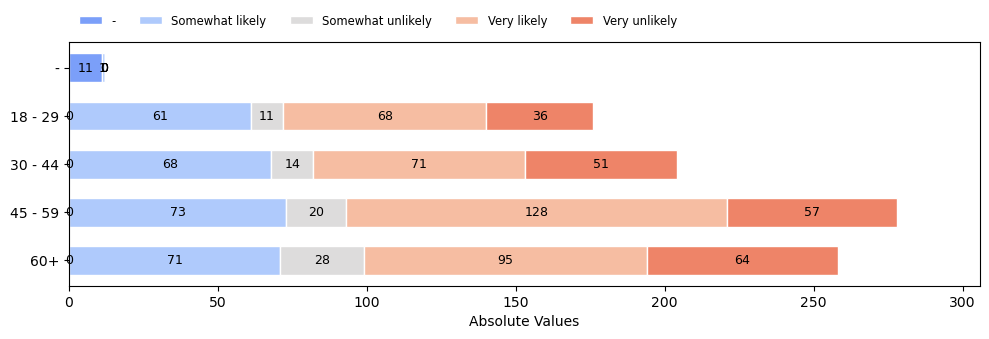

In [52]:
def survey(results, category_names):
    labels = results.index.tolist()
    data = results.values  
    data_cum = data.cumsum(axis=1)

    category_colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.8, data.shape[1]))

    plt.figure(figsize=(10, len(labels) * 0.7))
    plt.gca().invert_yaxis()
    plt.xlim(0, np.sum(data, axis=1).max() * 1.1)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = plt.barh(labels, widths, left=starts, height=0.6, label=colname, color=color, edgecolor="white")

        for rect, label in zip(rects, widths):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            text_color = "white" if np.mean(color[:3]) < 0.5 else "black"
            plt.text(x, y, f"{int(label)}", ha='center', va='center', fontsize=9, color=text_color)

    plt.legend(ncols=len(category_names), bbox_to_anchor=(0, 1.02), loc='lower left', fontsize='small', frameon=False)
    plt.xlabel("Absolute Values")
    plt.tight_layout()
    plt.show()

survey(results, category_names)